In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab
import matplotlib.pyplot as plt
tl = plt.tight_layout

In [2]:
pylab.rcParams['figure.figsize'] = (12, 5)

In [3]:
df = pd.read_csv("data.csv")
df.head()

,MMV,Make,Model,Variant,Type,Fuel Type,Age,Transmission,Color,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
0,HyundaiI10Sportz 1.2,Hyundai,I10,Sportz 1.2,Hatchback,Petrol,3,Manual,White,"12,000",1,8.5,8.8,537850,338352,37.1
1,HyundaiI20Magna (O) 1.2,Hyundai,I20,Magna (O) 1.2,Hatchback,Petrol,9,Manual,Beige,"68,000",1,5.0,7.3,613863,189200,69.2
2,HyundaiI20Sportz 1.2,Hyundai,I20,Sportz 1.2,Hatchback,Petrol,8,Manual,White,"31,143",1,6.2,4.6,678359,347568,48.8
3,HyundaiNeo Fluidic Elantra1.6SxAtCrdi,Hyundai,Neo Fluidic Elantra,1.6SxAtCrdi,Sedan,Diesel,2,Automatic,Silver,"6,000",1,8.5,7.9,2228480,1629250,26.9
4,HyundaiSantro XingXo,Hyundai,Santro Xing,Xo,Hatchback,Petrol,11,Manual,Golden,"100,000",2,4.3,9.9,453719,86240,81.0


In [4]:
# are MMV and dep correlated? 

df_mmv = pd.get_dummies(df["MMV"])
df_mmv["Dep"] = df["Dep"]
mmv_corr = df_mmv.corr()
mmv_corr["Dep"].sort_values()[::-1][1:15]

HondaCity ZxGXi             0.182072
HondaCivic1.8V AT           0.163274
HondaCivic1.8S MT           0.152603
HondaAccord2.4 AT           0.104922
HondaCivic1.8V MT           0.104897
ToyotaCorolla Altis1.8 G    0.102715
HondaCity ZxEXi             0.099857
HondaCityZx                 0.093926
Maruti SuzukiSx4ZXi         0.089893
HondaAccord2.4 VTi-L MT     0.088938
Maruti SuzukiSx4VXi         0.081692
HyundaiAccentGLE            0.074432
HondaCivic1.8Mt             0.070219
ToyotaCorollaG              0.069463
Name: Dep, dtype: float64

Very weak correlation between MMV and dep

In [5]:
df["Transmission"].unique()

array(['Manual', 'Automatic', 'Automated Manual Transmission'],
      dtype=object)

In [6]:
irrelevant = ["MMV", "Model", "Variant", "Color"] 
df = df.drop(irrelevant, axis=1)

In [7]:
# convert Kms to int
df["Kms"] = df["Kms"].apply(lambda x: int(x.replace(",", "")))

# normalize fuel tyes for "CNG" and "cng"
df["Fuel Type"] = df["Fuel Type"].apply(str.lower)



In [8]:
df.head()

,Make,Type,Fuel Type,Age,Transmission,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
0,Hyundai,Hatchback,petrol,3,Manual,12000,1,8.5,8.8,537850,338352,37.1
1,Hyundai,Hatchback,petrol,9,Manual,68000,1,5.0,7.3,613863,189200,69.2
2,Hyundai,Hatchback,petrol,8,Manual,31143,1,6.2,4.6,678359,347568,48.8
3,Hyundai,Sedan,diesel,2,Automatic,6000,1,8.5,7.9,2228480,1629250,26.9
4,Hyundai,Hatchback,petrol,11,Manual,100000,2,4.3,9.9,453719,86240,81.0


In [9]:
df["Type"].unique()

array(['Hatchback', 'Sedan', 'SUV', 'MUV', 'Van', 'Crossover'],
      dtype=object)

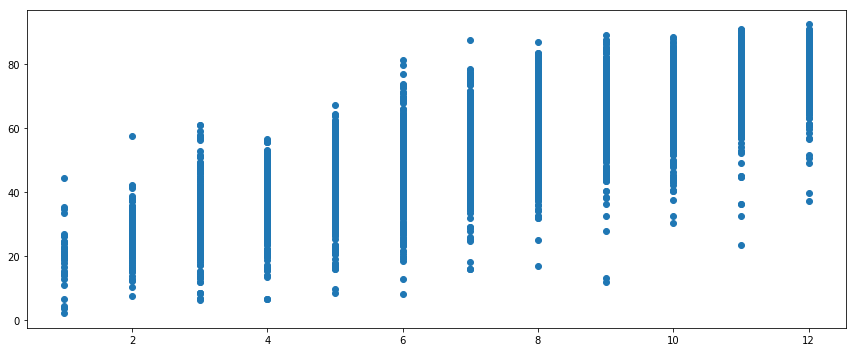

In [10]:
plt.scatter(df["Age"], df["Dep"])
tl()

In [11]:
df_one_hot = pd.get_dummies(df)

In [12]:
df_one_hot.columns

Index(['Age', 'Kms', 'No of Owner', 'Heath score', 'price score',
       'on road price', 'Current Price', 'Dep', 'Make_Honda', 'Make_Hyundai',
       'Make_Maruti Suzuki', 'Make_Toyota', 'Type_Crossover', 'Type_Hatchback',
       'Type_MUV', 'Type_SUV', 'Type_Sedan', 'Type_Van', 'Fuel Type_cng',
       'Fuel Type_diesel', 'Fuel Type_lpg', 'Fuel Type_petrol',
       'Fuel Type_petrol + cng', 'Fuel Type_petrol + lpg',
       'Transmission_Automated Manual Transmission', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

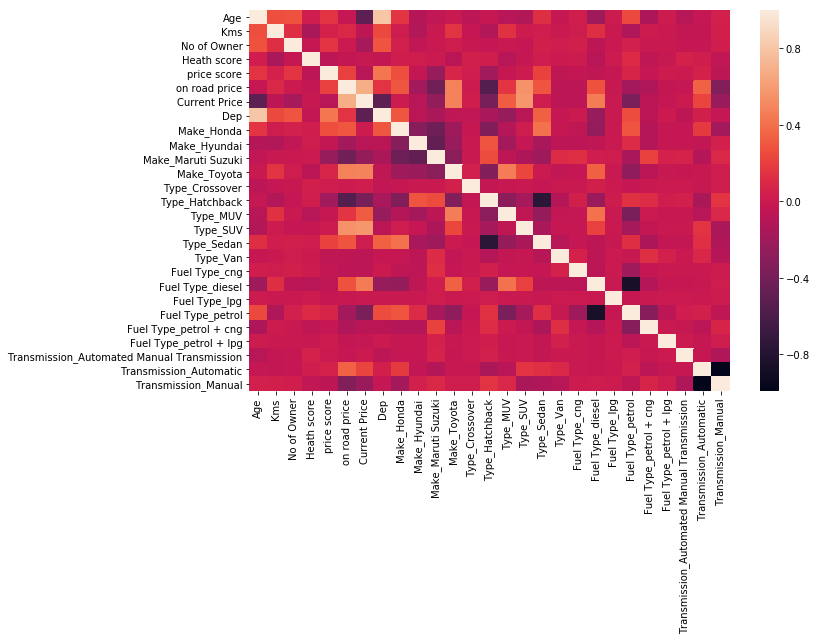

In [13]:
corr_mat = df_one_hot.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat)
tl()

In [14]:
corr_mat["Dep"].sort_values()[::-1]

Dep                                           1.000000
Age                                           0.801580
price score                                   0.426554
Type_Sedan                                    0.333235
Make_Honda                                    0.299646
No of Owner                                   0.288543
Fuel Type_petrol                              0.255682
Kms                                           0.241413
on road price                                 0.151973
Transmission_Automatic                        0.037868
Fuel Type_petrol + lpg                        0.004794
Fuel Type_cng                                 0.000992
Fuel Type_lpg                                -0.006842
Transmission_Manual                          -0.028218
Type_Van                                     -0.028888
Heath score                                  -0.036664
Type_Crossover                               -0.044595
Make_Toyota                                  -0.050076
Transmissi

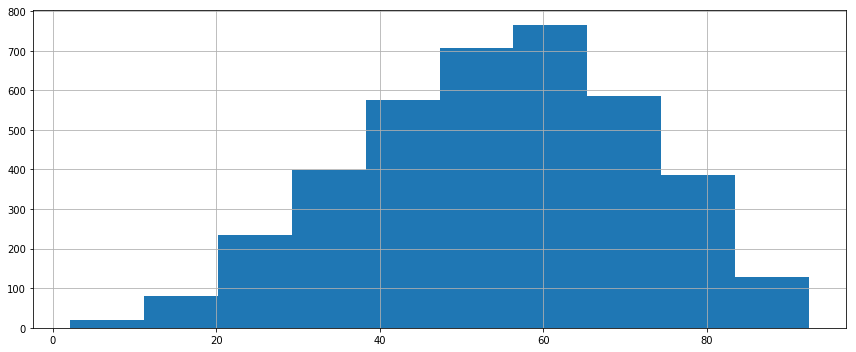

In [15]:
df["Dep"].hist()
tl()

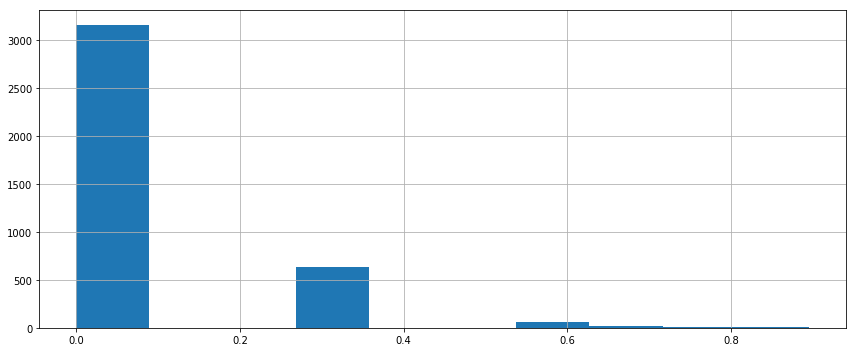

In [16]:
np.log(np.sqrt(df["No of Owner"])).hist()
tl()

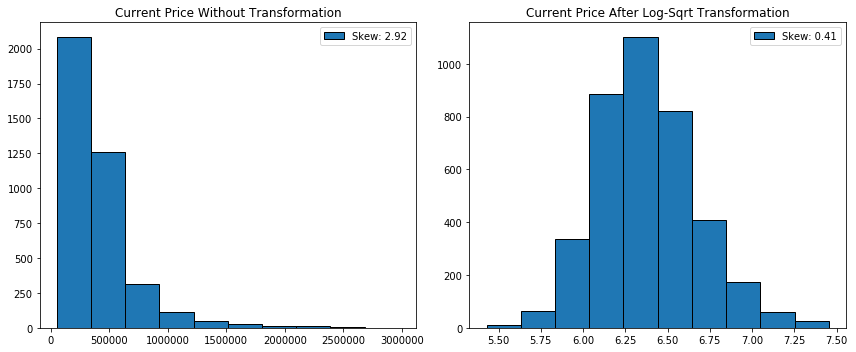

In [17]:
# df["Current Price"].hist()
plt.subplot(1, 2, 1)
plt.title("Current Price Without Transformation")
plt.hist(df["Current Price"], edgecolor="black", label="Skew: {0:.2f}".format(df["Current Price"].skew()))
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Current Price After Log-Sqrt Transformation")
plt.hist(np.log(np.sqrt(df["Current Price"] + 1)), edgecolor="black", 
         label="Skew: {0:.2f}".format(np.log(np.sqrt(df["Current Price"] + 1).skew())))
plt.legend()
tl();

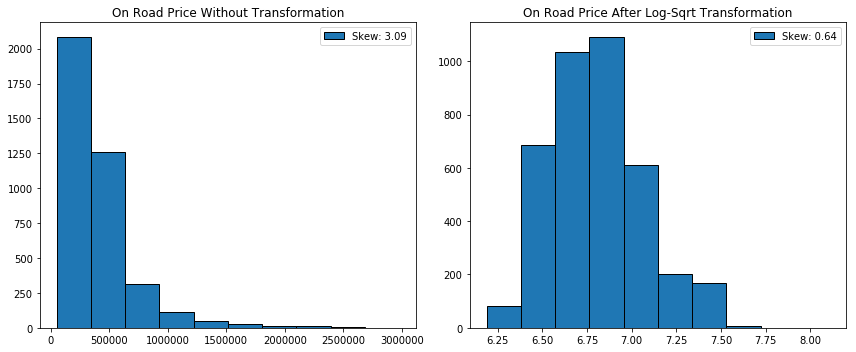

In [18]:
plt.subplot(1, 2, 1)
plt.title("On Road Price Without Transformation")
plt.hist(df["Current Price"], edgecolor="black", label="Skew: {0:.2f}".format(df["on road price"].skew()))
plt.legend()
plt.subplot(1, 2, 2)
plt.title("On Road Price After Log-Sqrt Transformation")
plt.hist(np.log(np.sqrt(df["on road price"] + 1)), edgecolor="black", 
         label="Skew: {0:.2f}".format(np.log(np.sqrt(df["on road price"] + 1)).skew()))
plt.legend()
tl();

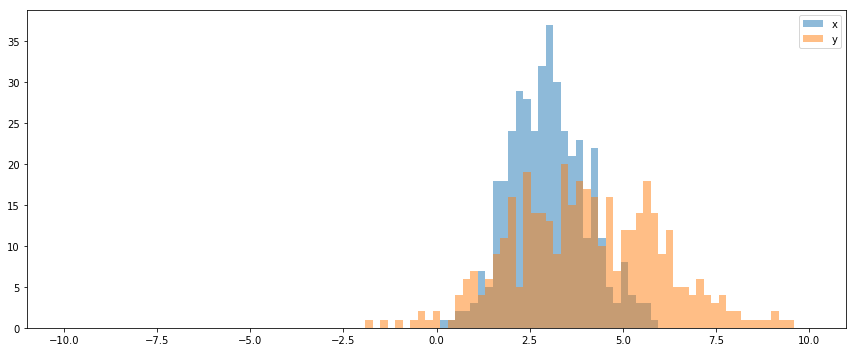

In [20]:
import random

x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = np.linspace(-10, 10, 100)

plt.hist(x, bins, alpha=0.5, label='x')
plt.hist(y, bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.tight_layout()